<a href="https://colab.research.google.com/github/AlfonsoVasquezC/DataFiles/blob/main/Redneuronal_Equipo52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import learning_curve, validation_curve #Check
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.inspection import permutation_importance

#**Ejercicio-1.** 

In [ ]:
path = 'https://raw.githubusercontent.com/AlfonsoVasquezC/DataFiles/main/dataset_Facebook.csv'

df = pd.read_csv(path, delimiter = ';')
df

Siguiendo el artículo, deberás considerar como predictores o variables de entrada aquellas que se indican en la Tabla 3

Por otro lado, en la Tabla 2, los autores consideran varios casos para la variable de salida, intentando determinar cuál puede ser el mejor caso para medir el éxito de la campaña. 

Para este ejercicio deberás considerar únicamente los siguientes tres casos como variable de salida: “Lifetime post consumers”, “Lifetime People who have liked a Page and engaged with a post” y “Likes”. 

In [3]:
df.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [4]:
X = df[['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid']]
       
y1 = df['Lifetime Post Consumers']
y2 = df['Lifetime People who have liked your Page and engaged with your post']
y3 = df['like']

In [5]:
X

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
0,139441,Photo,2,12,4,3,0.0
1,139441,Status,2,12,3,10,0.0
2,139441,Photo,3,12,3,3,0.0
3,139441,Photo,2,12,2,10,1.0
4,139441,Photo,2,12,2,3,0.0
...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0
496,81370,Photo,2,1,5,8,0.0
497,81370,Photo,1,1,5,2,0.0
498,81370,Photo,3,1,4,11,0.0


In [6]:
print(X.shape)
print(y1.shape)
print(y2.shape)
print(y3.shape)

(500, 7)
(500,)
(500,)
(500,)


1. En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las
mejores en el artículo antes citado: ‘Lifetime People who have liked a Page and engaged with a
post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables
que indican los autores en la Tabla 3 del artículo citado. 


In [7]:
y = df[['Lifetime People who have liked your Page and engaged with your post']]
y = y.rename(columns = {"Lifetime People who have liked your Page and engaged with your post": "LPE"})
y = y[['LPE']]
y

,LPE
0,119
1,1108
2,132
3,1386
4,396
...,...
495,392
496,301
497,363
498,370


Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y validación

#**Ejercicio-2.**

Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y validación

In [8]:
Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size = 0.20, random_state = 7)

print('Dimensión del conjunto de entrenamiento variables independientes: ', Xtv.shape)
print('Dimensión del conjunto de prueba variables independientes: ', Xtest.shape, '\n')
print('Dimensión del conjunto de entrenamiento variable dependiente: ', ytv.shape)
print('Dimensión del conjunto de prueba variable dependiente: ', ytest.shape)

Dimensión del conjunto de entrenamiento variables independientes:  (400, 7)
Dimensión del conjunto de prueba variables independientes:  (100, 7) 

Dimensión del conjunto de entrenamiento variable dependiente:  (400, 1)
Dimensión del conjunto de prueba variable dependiente:  (100, 1)


#**Ejercicio-3.**


Definirás tus propias funciones de errores para este problema de regresión. Los errores que utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el error porcentual absoluto medio MAPE.

In [9]:
def nues_RMSE(yreal,ypred):
  m = np.mean(np.power(np.subtract(yreal,ypred), 2))
  return np.sqrt(m)  

def nues_MAE(yreal,ypred):
  m = np.abs(np.subtract(yreal,ypred))
  return np.mean(m)  

def nues_MAPE(yreal,ypred):
  m = np.abs(np.subtract(yreal,ypred)/yreal)
  return np.mean(m) * 100

#**Ejercicio-4.**

En la página de la UCI, así como en el artículo de los autores previamente citado encuentras información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida. Utiliza un Pipeline para evitar el filtrado de información.

In [10]:
Xtv

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
342,117764,Photo,2,5,2,11,0.0
359,116091,Photo,3,5,7,2,0.0
109,136736,Status,2,10,7,3,0.0
50,138353,Photo,2,11,1,9,0.0
452,93363,Photo,1,2,5,6,0.0
...,...,...,...,...,...,...,...
211,132201,Photo,3,8,5,10,0.0
67,138185,Photo,1,11,7,3,1.0
25,138458,Status,2,12,6,3,0.0
196,133594,Photo,1,8,6,8,0.0


In [11]:
Xtv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 342 to 175
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page total likes  400 non-null    int64  
 1   Type              400 non-null    object 
 2   Category          400 non-null    int64  
 3   Post Month        400 non-null    int64  
 4   Post Weekday      400 non-null    int64  
 5   Post Hour         400 non-null    int64  
 6   Paid              399 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 25.0+ KB


In [12]:
# Definimos las columnas que corresponden a cada tipo de dato

#Se establecen como variables categoricas aquellas que tienen un numero finito de valores posibles
names_pipeline_cat = ['Type', 'Category'] 

#Se establecen como variables numericas aquellas que contienen un numero muy grande de valores enteros posibles 
names_pipeline_num = ['Page total likes']

#Se establecen como variables binarias aquellas que solo tienen dos valores posibles
names_pipeline_bin = ['Paid']

#Se establecen como variables ordinales aquellas variables que son categoricas y que tienen un orden logico entre sus valores. 
#Por ejemplo, la variable employment duration tiene valores entre 1 y 5, donde 1 es desempleado, 2 empleado hace menos de un año y asi en adeltante
# Estas variables cuentan con valores que tienen una correlación con la variable a la que representan 
# (A mayor valor de la variable ordinal, mayor impacto tiene esto en la representación de la variable a la que esta representando).

names_pipeline_ord = ['Post Month', 'Post Weekday', 'Post Hour']

#Se unen tanto categoricas como binarias para transformación futura

names_pipeline_cat_bin = names_pipeline_cat + names_pipeline_bin

In [13]:
# Definimos las Pipelines

# Transformaciones a factores categóricos y binarios de entrada: remplazo por moda y aplicación de OneHotEncoder para crear columnas Dummies
pipeline_cat_bin = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                     ('OneHotE', OneHotEncoder(handle_unknown = 'ignore'))])

# Transformaciones a factores numéricos de entrada: remplazo con promedio y escalación gaussiana
pipeline_num = Pipeline(steps = [('impMedian', SimpleImputer(strategy='median')),
                                 ('escalaNum', StandardScaler())])

# Transformaciones a factores ordinales de entrada: remplazo con moda y escalación gaussiana
pipeline_ord = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])


# Aplicamos las transformaciones a las columnas correspondientes con ColumnTransformer

transformaciones = ColumnTransformer( transformers = [
                                                      ('numimp', pipeline_num, names_pipeline_num ),
                                                      ('catbimp', pipeline_cat_bin, names_pipeline_cat_bin),
                                                      ('ordimp', pipeline_ord, names_pipeline_ord)],
                                                      remainder='passthrough')

In [14]:
pipeline_salida = Pipeline(steps=[('impMedian', SimpleImputer(strategy='median'))])
names_pipeline_salida = ['LPE']

transformacionessalida = ColumnTransformer( transformers = [('outimp', pipeline_salida, names_pipeline_salida)], 
                                           remainder = 'passthrough')

#**Ejercicio-5.**

Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y 
validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la actividad. Consulta su documentación correspondiente:  
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html  

In [15]:
modeloDLR = DummyRegressor()

In [16]:
Xtvtransf = transformaciones.fit_transform(Xtv)
ytvtransf = transformacionessalida.fit_transform(ytv)



In [17]:
Xtrain, Xval, ytrain, yval = train_test_split(Xtvtransf, ytvtransf, test_size = 0.25, random_state = 7)
print('Dimensión del conjunto de entrenamiento variables independientes: ', Xtrain.shape)
print('Dimensión del conjunto de prueba variables independientes: ', Xval.shape, '\n')
print('Dimensión del conjunto de entrenamiento variable dependiente: ', ytrain.shape)
print('Dimensión del conjunto de prueba variable dependiente: ', yval.shape)

Dimensión del conjunto de entrenamiento variables independientes:  (300, 13)
Dimensión del conjunto de prueba variables independientes:  (100, 13) 

Dimensión del conjunto de entrenamiento variable dependiente:  (300, 1)
Dimensión del conjunto de prueba variable dependiente:  (100, 1)


In [18]:
modeloDLR.fit(Xtrain, ytrain)

DummyRegressor()

In [19]:
DLRyhat = modeloDLR.predict(Xval)

In [20]:
DLRyhat

array([610.20333333, 610.20333333, 610.20333333, 610.20333333,
       610.20333333, 610.20333333, 610.20333333, 610.20333333,
       610.20333333, 610.20333333, 610.20333333, 610.20333333,
       610.20333333, 610.20333333, 610.20333333, 610.20333333,
       610.20333333, 610.20333333, 610.20333333, 610.20333333,
       610.20333333, 610.20333333, 610.20333333, 610.20333333,
       610.20333333, 610.20333333, 610.20333333, 610.20333333,
       610.20333333, 610.20333333, 610.20333333, 610.20333333,
       610.20333333, 610.20333333, 610.20333333, 610.20333333,
       610.20333333, 610.20333333, 610.20333333, 610.20333333,
       610.20333333, 610.20333333, 610.20333333, 610.20333333,
       610.20333333, 610.20333333, 610.20333333, 610.20333333,
       610.20333333, 610.20333333, 610.20333333, 610.20333333,
       610.20333333, 610.20333333, 610.20333333, 610.20333333,
       610.20333333, 610.20333333, 610.20333333, 610.20333333,
       610.20333333, 610.20333333, 610.20333333, 610.20

In [21]:
def metricas(yval,ypred):

  RMSE = nues_RMSE(yval,ypred)
  MAE = nues_MAE(yval,ypred)
  MAPE =nues_MAPE(yval,ypred)

  return print('RMSE', RMSE, '\n', 'MAE', MAE, '\n', 'MAPE', MAPE)

print('Conjuntos de Entrenamiento', '\n')
metricas(ytrain, DLRyhat)

print('\n','Conjuntos de Validación', '\n')
metricas(yval, DLRyhat)

Conjuntos de Entrenamiento 

RMSE 648.21097027811 
 MAE 403.9488444444445 
 MAPE 179.68211054544756

 Conjuntos de Validación 

RMSE 568.1433815019273 
 MAE 386.5357333333333 
 MAPE 93.0372131858349


#**Ejercicio-6.**

Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada (RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de
información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de iteraciones para que todos los modelos converjan

In [22]:
#Definimos los modelos que se compararán entre si
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Líneal:
  modelos.append(LinearRegression())
  nombres.append('LR')

  # RF - Random Forest:
  modelos.append(RandomForestClassifier())
  nombres.append('RF')
  
  # MLP - Perceptrón Multi Capa:  
  modelos.append(MLPRegressor(max_iter = 5000))
  nombres.append('MLP')
  

  return modelos, nombres

In [23]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):

  
  pipeline = Pipeline(steps=[('transformaciones',transformaciones),('modelos',modelos[i])])

  cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=7)

  nuestras_metricas = {'RMSE':make_scorer(nues_RMSE),
                       'MAE':make_scorer(nues_MAE),
                       'MAPE':make_scorer(nues_MAPE)}

  #resultadoscv = cross_validate(pipeline, Xtv, np.ravel(ytv), n_jobs= -1, scoring=nuestras_metricas, cv=cv, return_train_score=True)

  Xtvtransf = transformaciones.fit_transform(Xtv)
  ytvtransf = transformacionessalida.fit_transform(ytv)
  
  
  resultadoscv = cross_validate(modelos[i], Xtvtransf, np.ravel(ytvtransf), n_jobs= -1, scoring=nuestras_metricas, cv=cv, return_train_score=True)


  resultados.append(resultadoscv)

  print('Train Scores:\n')
  
  print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' 
        % (nombres[i],
                                                                          np.mean(resultadoscv['train_RMSE']),
                                                                          np.std(resultadoscv['train_RMSE']), 
                                                                          np.mean(resultadoscv['train_MAE']),
                                                                          np.std(resultadoscv['train_MAE']), 
                                                                          np.mean(resultadoscv['train_MAPE']),
                                                                          np.std(resultadoscv['train_MAPE'])                                                                      
                                                                          ))

  print('\nTest Scores (Validation):\n')

  print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' 
        % (nombres[i],
                                                                          np.mean(resultadoscv['test_RMSE']),
                                                                          np.std(resultadoscv['test_RMSE']), 
                                                                          np.mean(resultadoscv['test_MAE']),
                                                                          np.std(resultadoscv['test_MAE']), 
                                                                          np.mean(resultadoscv['test_MAPE']),
                                                                          np.std(resultadoscv['test_MAPE'])
                                                                          ))  


Train Scores:

LR:
mean RMSE: 474.915 (27.8796)
mean MAE: 289.973 (12.0189)
mean MAPE: 109.972 (10.1436)


Test Scores (Validation):

LR:
mean RMSE: 487.520 (96.8629)
mean MAE: 299.493 (43.3684)
mean MAPE: 113.503 (47.0124)

Train Scores:

RF:
mean RMSE: 31.024 (15.5721)
mean MAE: 2.191 (1.1036)
mean MAPE: 1.127 (0.8790)


Test Scores (Validation):

RF:
mean RMSE: 625.180 (103.5245)
mean MAE: 355.748 (55.6590)
mean MAPE: 128.737 (86.6049)

Train Scores:

MLP:
mean RMSE: 460.414 (31.2683)
mean MAE: 282.976 (13.8329)
mean MAPE: 105.673 (10.4369)


Test Scores (Validation):

MLP:
mean RMSE: 492.048 (95.7617)
mean MAE: 303.348 (41.8263)
mean MAPE: 113.405 (48.9807)



Podemos observar que el modelo que presenta los menores valores tanto de RMSE, MAE y MAPE es el modelo de regresión líneal multiple.

El modelo que presenta los peores resultados es el de Random Forest.

Además, observamos que el modelo de Random Forest es el que esta mayormente sobreentrenado, pues su rendimiento en el conjunto de entrenamiento es casi perfecto, mientras que al exponerlo a los datos de validación se vuelve el menos óptimo. Linear regression y MLP parecen no estar sobreentrenados.

A manera general los tres modelos en sus condiciones estandares tienen un resultado poco convencedor, pues el Dummy Regressor presenta mejor desempeño en cuanto al MAPE. En los otros dos, presenta el Dummy un peor desempeño

#**Ejercicio-7.**

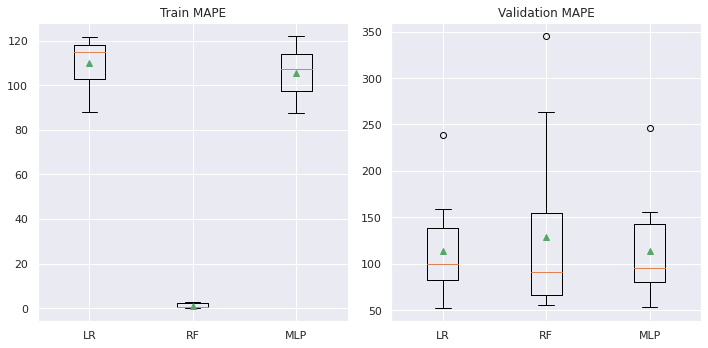

In [24]:
from matplotlib.axes import Subplot
import seaborn as sns

#Se muestra en un BoxPlot los resultados correspondientes a la métrica MAPE de los tres modelos
sns.set_theme(rc={'figure.figsize':(10,5)})
fig, axes = plt.subplots(1, 2)
axes[0].set_title("Train MAPE")
axes[1].set_title("Validation MAPE")


bpMAPEtrain = list()
bpMAPEtest = list()

for i in range(len(resultados)):
  results = resultados[i]['train_MAPE']
  bpMAPEtrain.append(results)
  
for i in range(len(resultados)):
  results = resultados[i]['test_MAPE']
  bpMAPEtest.append(results)

plt.subplot(1,2,1)
plt.boxplot(bpMAPEtrain, labels=nombres, showmeans=True)
plt.title(label="Train MAPE")
plt.subplot(1,2,2)
plt.boxplot(bpMAPEtest, labels=nombres,showmeans = True)
plt.title(label="Validation MAPE")

plt.tight_layout()
plt.show()

El valor de MAPE para la variable de salida "Lifetime people who have liked your page and engaged with your post" fue de 26.9, lo cual supera considerablemente los valores que estamos obteniendo, los cuales rondan alrededor de un MAPE de 100.

#**Ejercicio-8.**

Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados. 

In [28]:
modeloMLP = MLPRegressor(max_iter= 5000, random_state=11)

# hidden_layer_sizes”, “alpha” y “learning_rate_init”.

Xtvtransf = transformaciones.fit_transform(Xtv)
ytvtransf = transformacionessalida.fit_transform(ytv)

'''dicc_grid = {'hidden_layer_sizes':[(2,), (8,), (100,), (1000,),  (2,1), (8,4), (100,50), (1000,500)], #indicamos nodos por cada capa, donde cada , dentro del tuple es una capa.
             'alpha':[0.0001, 0.001, 0.01, 0.1],
             'learning_rate_init': [0.0001, 0.001, 0.01],
             'solver':['sgd', 'adam']}'''

dicc_grid = [
 
        {'solver': ['lbfgs'], 'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0], 'hidden_layer_sizes':[(2,), (100,), (200,), (80,40)]},
        {'solver': ['adam'], 'learning_rate_init': [0.0001, 0.001, 0.01], 'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0],'hidden_layer_sizes':[(2,), (100,), (200,), (80,40)]},
        {'solver': ['sgd'], 'learning_rate_init': [0.0001, 0.001, 0.01],'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0],'hidden_layer_sizes':[(2,), (100,), (200,), (80,40)]}
    ]

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=11)

grid = GridSearchCV(estimator=modeloMLP, 
                    param_grid=dicc_grid, 
                    cv=cv,
                    n_jobs = -1,
                    scoring=make_scorer(nues_MAPE))

In [ ]:
grid.fit(Xtvtransf, ytvtransf)

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

#**Ejercicio-9.**

Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones. 

In [ ]:
# Una vez inicializado y entrenada la MLP, veamos qué factores considera más importantes:

modeloMLP = MLPRegressor(hidden_layer_sizes=(11,11), 
                            max_iter=20000, 
                            alpha=0.0001,
                            learning_rate_init=0.001)  

modeloMLP.fit(Xtvtransf, ytvtransf)

importanceMLP = permutation_importance(modeloMLP, Xtvtransf, ytvtransf, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importanceMLP['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importanceMLP['importances_mean']))], importanceMLP['importances_mean'])
plt.show()

#**Ejercicio-10.**

Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras. 

In [ ]:
modeloRF = RandomForestClassifier(random_state=11)

Xtvtransf = transformaciones.fit_transform(Xtv)
ytvtransf = transformacionessalida.fit_transform(ytv)

dicc_grid = {'modelo__ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100.],
             'modelo__criterion':['gini', 'entropy', 'log_loss'],
             'modelo__max_depth': [1,2,8, None],
             'modelo__min_samples_split':[0.1,0.3,0.5,1.0],
             'modelo__class_weight':['balanced', None]
             }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11)

grid = GridSearchCV(estimator=modeloRF, 
                    param_grid=dicc_grid, 
                    cv=cv,
                    n_jobs = -1, 
                    scoring=make_scorer(nues_MAPE))
                    

In [ ]:
grid.fit(Xtvtransf, ytvtransf)

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

In [ ]:
# Una vez inicializado y entrenada la MLP, veamos qué factores considera más importantes:

modeloRF = RandomForestClassifier()  

modeloRF.fit(Xtvtransf, ytvtransf)

importanceRF = permutation_importance(modeloRF, Xtvtransf, ytvtransf, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importanceRF['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importanceRF['importances_mean']))], importanceRF['importances_mean'])
plt.show()

#**Ejercicio-11.**

Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras. 

In [ ]:
modeloLR = LogisticRegression(, random_state=11)

Xtvtransf = transformaciones.fit_transform(Xtv)
ytvtransf = transformacionessalida.fit_transform(ytv)

# C, solver, class_weight y penalty. 

c_param = [0.0001,0.01,0.1,1.0,10.,100.]
## Primera corrida, valor de C en 0.1

#c_param = [0.01,0.05,0.1,0.15,0.20]
#c_param = [0.06,0.07,0.08,0.09,0.10]


dicc_grid = [
 
        {'penalty': ['l1'], 'solver': [ 'saga', 'liblinear'], 'class_weight':['balanced', None], 'C': c_param},
        {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'class_weight':['balanced', None], 'C': c_param},
        {'penalty': ['elasticnet'], 'solver': ['saga'], 'class_weight':['balanced', None], 'C': c_param, 'l1_ratio': [0.5]},
        {'penalty': ['none'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'class_weight':['balanced', None]}
    ]

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11)

grid = GridSearchCV(estimator=modeloLR, 
                    param_grid=dicc_grid, 
                    cv=cv,
                    n_jobs = -1,
                    scoring=make_scorer(nues_f1score))

In [ ]:
grid.fit(Xtvtransf, ytvtransf)

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

In [ ]:
# Una vez inicializado y entrenada la MLP, veamos qué factores considera más importantes:

modeloLR = LinearRegression()  

modeloLR.fit(Xtvtransf, ytvtransf)

importanceLR = permutation_importance(modeloLR, Xtvtransf, ytvtransf, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importanceLR['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importanceLR['importances_mean']))], importanceLR['importances_mean'])
plt.show()

#**Ejercicio-12.**

Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con respecto a MAPE. Incluye tus conclusiones finales de la actividad. 

In [ ]:
None

###**Fin de la Actividad de la semana 7.**